# Task 2

Import useful packages and source code:

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# Import neural network
import sys
sys.path.insert(0, '../src')

from Task_2.activation_layer import ActivationLayer
from Task_2.adam_optimizer import AdamOptimizer
from Task_2.layer import Layer
from Task_2.neural_network import NeuralNetwork

Load data:

In [3]:
digits = load_digits()
X = digits.data  # type: ignore
y = digits.target  # type: ignore

st = StandardScaler()
X = st.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=65,train_size=0.8)
y_train = to_categorical(y_train) # [150 x 10]

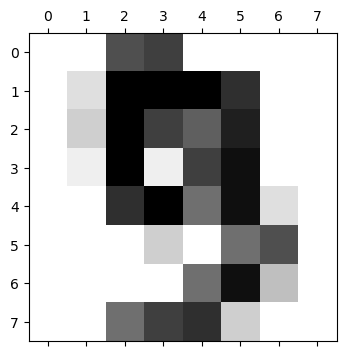

In [4]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(digits.images[9], cmap="binary")  # type: ignore

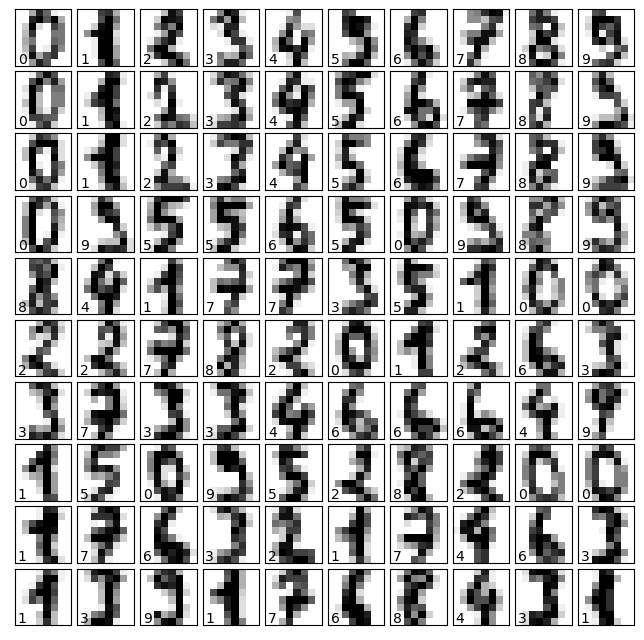

In [5]:
fig, axes = plt.subplots(10,10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):  # type: ignore
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')  # type: ignore
    ax.text(0.05, 0.05, str(digits.target[i]),  # type: ignore
            transform=ax.transAxes, color='black')

## First neural network

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

digits = load_digits()
X = digits.data
y = digits.target

st = StandardScaler()
X = st.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=65,train_size=0.8)
y_train = to_categorical(y_train) # [150 x 10]

## Model tuning

Accuracy: 0.616


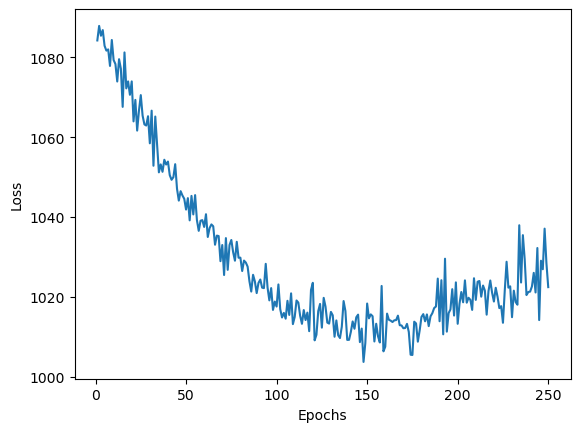

In [11]:
acc = []
L_range = np.zeros((10,250))

for ind in range(10):

    NN = NeuralNetwork(learning_rate = 0.00003, max_epochs = 250, type_loss = "cross_entropy",optimizer=AdamOptimizer())
    NN.add(Layer(X.shape[1])) # Add input layer
    NN.add(Layer(80, dropout_percentile=0.8, activation_function=ActivationLayer("sigmoid"))) # Add hidden layer
    NN.add(Layer(y_train.shape[1], dropout_percentile=0.85, activation_function=ActivationLayer("softmax"))) # Add output layer
    NN.build_network()

    L = NN.fit_mini_batch(X_train,y_train, toll = 0.01, n_mini_batches = 10) # 10: set toll as tollerance parameter to stop the search

    y_pred = NN.predict(X_test)

    y = np.argmax(y_pred,axis = 1)
    
    acc.append(accuracy_score(y,y_test))
    L_range[ind] = L
    
print("Accuracy: %.3f" %np.mean(acc))

L_plot = np.mean(L_range,axis=0)
fig, ax = plt.subplots()
ax.plot(range(1,len(L_plot)+1),L_plot)
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss");